# M2 | Exploration Notebook

In this notebook, you will do a first exploration of the data set that you will use for your project. One part of this exploration is guided, i.e. we will ask you to solve specific questions (task 1-3). The other part is open, i.e. we will ask you to come up with your own exploration ideas (task 4). 

Please upload your solved notebook to Moodle (under Milestone 2 Submission)adding your SCIPER number in title, example: m2-lernnavi-456392.ipynb


## Brief overview of Lernnavi
[Lernnavi](https://www.lernnavi.ch) is an instrument for promoting part of the basic technical study skills in German and mathematics.


For the guided part of the exploration we will focus on the three main tables:
* *users*: demographic information of users.
* *events*: events done by the users in the platform.
* *transactions*: question and answer solved by user.

### Users
* user_id: unique identifier of user in database.
* gender: only three values: M male, F female or missing. 
* canton: swiss canton.
* class_level: school year in swiss system.


### Events
* event_id: unique identifier of event in database.
* user_id: user who peformed the event.
* timestamp: timestamp of event.
* category: classification of action (task, general, statistics, etc).
* action: type of action performed.
* event_type: whether the students viewed or clicked in the event.
* transaction_token: used to link to transactions table.
* session_id: session during which the event took place.
* tracking_data: optional content associated to this event (e.g., the new points mastered for a topic).


### Transactions
* transaction_id: unique identifier of transaction in database.
* transaction_token: used to link to events table.
* user_id: user who performed the transaction.
* document_id: document that was answered in transaction.
* document_version: version of document that was answered.
* evaluation: whether the user answered correctly or not. It is possible that it was only partially right. 
* input: answer the user gave.
* start_time: timestamp of when the user started answering.
* commit_time: timestamp of when the user submitted the answer.
* user_agent: the browser that the user used.
* validation: used to validate the format of the input.
* solution: solution to question.
* type: type of question that was answered. 


In [1]:
# Import the tables of the data set as dataframes.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set(font_scale=1.2)
sns.set_theme(style="whitegrid")

DATA_DIR = 'data-m2' #You many change the directory

users = pd.read_csv('{}/users.csv'.format(DATA_DIR))
events = pd.read_csv('{}/events.csv'.format(DATA_DIR))
transactions = pd.read_csv('{}/transactions.csv'.format(DATA_DIR))

## Task 1: Simple Statistics

In this task you are asked to do a first coarse exploration of the data set, using simple statistics and visualizations.

#### a) How many distinct participants do we have in the data set?


In [2]:
## Your code goes here
users['user_id'].nunique()

13695

#### b) How many transactions were done per user? Please provide a visualization and discuss the distribution.

<AxesSubplot:ylabel='Frequency'>

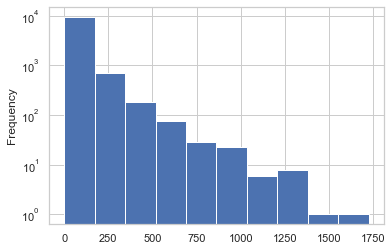

In [3]:
# Your code goes here
%matplotlib inline
users_trans = transactions.groupby('user_id')
users_trans.apply(len).plot(kind='hist', logy=True)

The data distribution exhibits a **long-tailed** distribution, with most users having only a small amount of transactions.

#### c) Which are the 10 most popular event actions? Please provide a visualization of the frequency of the top 10 event actions.

Hint: See actions in table events.

In [4]:
# Your code goes here
events['action'].value_counts()[:10]

PAGE_VISIT              653725
REVIEW_TASK             513389
SUBMIT_ANSWER           419862
NAVIGATE_DASHBOARD      350821
NEXT                    277020
WINDOW_VISIBLE_FALSE    240660
WINDOW_VISIBLE_TRUE     199287
VIEW_QUESTION           154592
OPEN_FEEDBACK            87071
GO_TO_THEORY             80746
Name: action, dtype: int64

<AxesSubplot:>

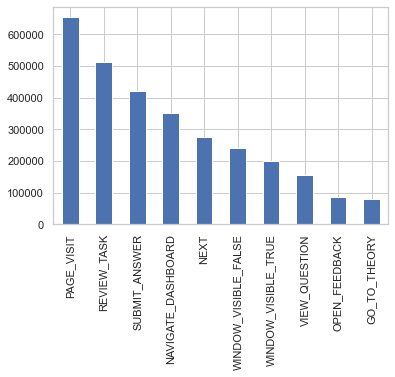

In [5]:
events['action'].value_counts()[:10].plot(kind='bar')

*Your discussion/interpretation goes here*

## Task 2: Static Analysis

In this second task, you will do a univariate an multivariate exploration of some aggregated features.

#### a) Build a data frame containing one row per user:

``[user_id, gender, num_events, num_questions, percentage_correct, num_reading]``


The features are defined as follows:

- **num_questions**: total number of questions the student answered (hint: action event = submit answer)

- **num_events**: total number of events of the student  

- **percentage_correct**: number of correct answers/total number of answers (hint: evaluation = correct). If desired, you may assign a weight of 0.5 to partially correct answers. 

- **num_reading**: total number of theory reading events  (hint: action event = go to theory)

In [6]:
# Your code for building the data frame here
events_with_eval = pd.merge(events, transactions[['transaction_token', 'evaluation']],
                            left_on='transaction_token', right_on='transaction_token', how='left')

events_with_eval['evaluation'] = events_with_eval['evaluation'].map({"CORRECT": 1, "PARTIAL": 0.5, "WRONG": 0})
events_with_eval

,event_id,user_id,timestamp,category,action,event_type,transaction_token,session_id,tracking_data,evaluation
0,62,393211,1621583814885,TASK,VIEW_QUESTION,VIEW,7a10ca52-ffb5-4069-8800-0dc86d778e94,NaN,NaN,NaN
1,63,393211,1621583898912,TASK,SUBMIT_ANSWER,CLICK,7a10ca52-ffb5-4069-8800-0dc86d778e94,NaN,NaN,NaN
2,64,393211,1621583907207,TASK,NEXT,CLICK,7a10ca52-ffb5-4069-8800-0dc86d778e94,NaN,NaN,NaN
3,65,393211,1621583907589,TASK,VIEW_QUESTION,VIEW,88fdcaad-f73b-46a2-b561-d262f2441442,NaN,NaN,NaN
4,66,393211,1621584222588,TASK,SUBMIT_ANSWER,CLICK,88fdcaad-f73b-46a2-b561-d262f2441442,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
3465554,3518462,404560,1645519933345,TASK,SUBMIT_ANSWER,CLICK,9edfed2d-ebe8-4b0e-873c-9ba13e6541b3,112259.0,NaN,1.0
3465555,3518463,404560,1645519934803,TASK,NEXT,CLICK,9edfed2d-ebe8-4b0e-873c-9ba13e6541b3,112259.0,NaN,1.0
3465556,3518464,404560,1645519935451,SESSION,REVIEW_TASK,VIEW,133248bc-5771-4240-94c2-77b23b7c2d97,112259.0,NaN,NaN
3465557,3518465,404552,1645519936842,USER_SESSION,WINDOW_VISIBLE_TRUE,VIEW,NaN,NaN,"{""location"": ""https://app.lernnavi.ch/session/...",NaN


In [7]:
user_gender = users[['user_id', 'gender']]
users_events = events_with_eval.groupby('user_id')
user_num_questions = users_events.apply(lambda x: len(x[x['action'] == 'SUBMIT_ANSWER']))
user_num_questions = user_num_questions.reset_index(name='num_questions')
user_stats = pd.merge(user_gender, user_num_questions, on='user_id', how='right')
user_stats

,user_id,gender,num_questions
0,387604,NaN,97
1,387605,NaN,217
2,387608,NaN,54
3,387615,MALE,15
4,387643,NaN,0
...,...,...,...
10108,404600,NaN,1
10109,404603,FEMALE,13
10110,404604,FEMALE,4
10111,404605,FEMALE,0


In [8]:
user_stats = user_stats.merge(users_events.apply(len).reset_index(name='num_events'), on='user_id')
user_stats

,user_id,gender,num_questions,num_events
0,387604,NaN,97,2606
1,387605,NaN,217,3331
2,387608,NaN,54,866
3,387615,MALE,15,492
4,387643,NaN,0,4
...,...,...,...,...
10108,404600,NaN,1,34
10109,404603,FEMALE,13,112
10110,404604,FEMALE,4,43
10111,404605,FEMALE,0,22


In [9]:
percentage_correct = users_events.apply(lambda x: x['evaluation'].sum() / len(x[x['evaluation'] != np.nan]))
user_stats = user_stats.merge(percentage_correct.reset_index(name='percentage_correct'), on='user_id')
user_stats

,user_id,gender,num_questions,num_events,percentage_correct
0,387604,NaN,97,2606,0.056408
1,387605,NaN,217,3331,0.094716
2,387608,NaN,54,866,0.131640
3,387615,MALE,15,492,0.087398
4,387643,NaN,0,4,0.000000
...,...,...,...,...,...
10108,404600,NaN,1,34,0.000000
10109,404603,FEMALE,13,112,0.254464
10110,404604,FEMALE,4,43,0.069767
10111,404605,FEMALE,0,22,0.000000


In [10]:
num_reading = users_events.apply(lambda x: len(x[x['action'] == 'GO_TO_THEORY']))
user_stats = user_stats.merge(num_reading.reset_index(name='num_reading'), on='user_id')
user_stats

,user_id,gender,num_questions,num_events,percentage_correct,num_reading
0,387604,NaN,97,2606,0.056408,368
1,387605,NaN,217,3331,0.094716,33
2,387608,NaN,54,866,0.131640,23
3,387615,MALE,15,492,0.087398,10
4,387643,NaN,0,4,0.000000,0
...,...,...,...,...,...,...
10108,404600,NaN,1,34,0.000000,0
10109,404603,FEMALE,13,112,0.254464,0
10110,404604,FEMALE,4,43,0.069767,0
10111,404605,FEMALE,0,22,0.000000,0


#### b) Perform a univariate analysis (including descriptive statistics and visualizations) for the five features (gender, num_events, num_questions, percentage_correct, num_reading) of your dataframe. Please check the lecture slides regarding information on how to perform a univariate analysis for categorical and numerical features. Discuss your results: how are the features distributed? Are there any anomalities?

In [11]:
user_stats.iloc[:, 1:].describe()

,num_questions,num_events,percentage_correct,num_reading
count,10113.000000,10113.000000,10113.000000,10113.000000
mean,41.517057,342.683576,0.169905,7.984377
std,76.469736,577.384662,0.135805,37.301945
min,0.000000,1.000000,0.000000,0.000000
25%,6.000000,79.000000,0.023529,0.000000
50%,20.000000,173.000000,0.174157,0.000000
75%,44.000000,365.000000,0.267857,5.000000
max,1054.000000,10044.000000,0.941176,2404.000000


<AxesSubplot:>

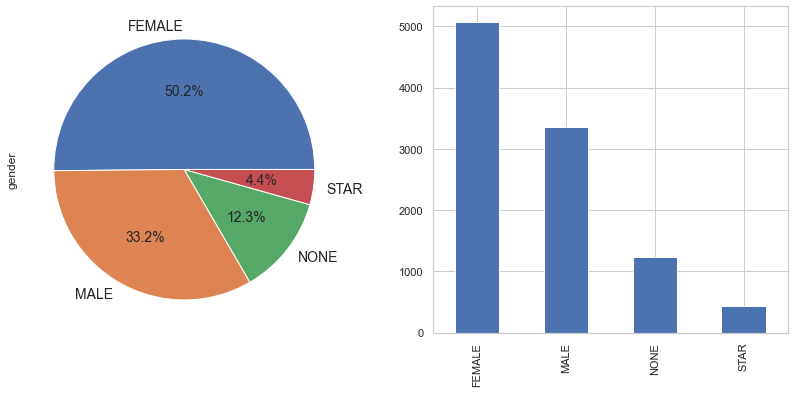

In [12]:
# Your code for univariate analysis her
fig, axs = plt.subplots(1,2, figsize=(14, 6))
axs = axs.flatten()
user_stats.fillna('NONE', inplace=True)
user_stats['gender'].value_counts().plot(kind='pie', ax=axs[0], autopct='%1.1f%%', fontsize=14)
user_stats['gender'].value_counts().plot(kind='bar', ax=axs[1])

For categorical features `gender`, most users are FEMALE and MALE, and FEMALE attribute to half of the user's gender.

Text(0.5, 0.98, 'Distribution for all the numerical columns')

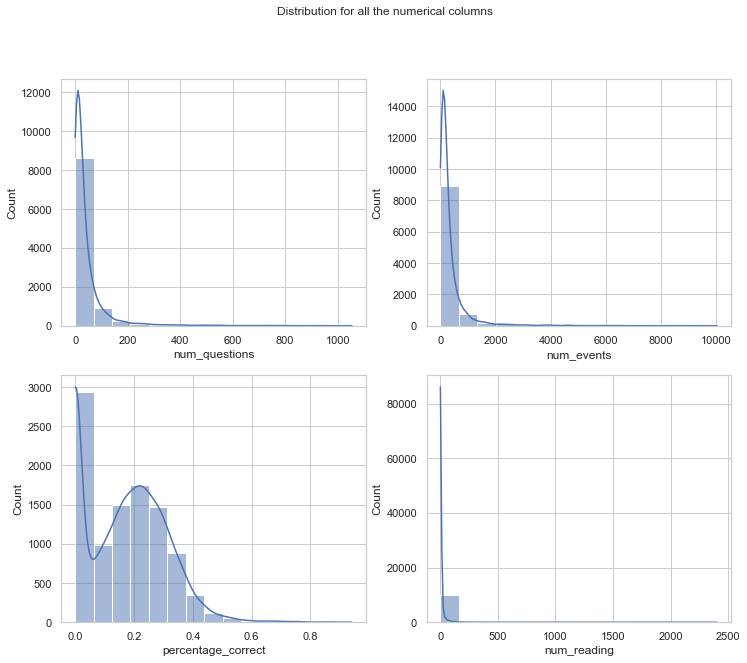

In [13]:
fig, axs = plt.subplots(2,2, figsize=(12, 10))
axs = axs.flatten()
for ax, col in zip(axs, user_stats.columns[2:]):
    sns.histplot(user_stats[col], ax=ax, kde=True, bins=15)
fig.suptitle('Distribution for all the numerical columns')

For numerical data, the distributions all exhibit a long-tailed distribution. Besides, `percentage_correct` feature shows some anomalities that lots of users have zero percentage_correct.

#### c) Come up with two additional features on your own and add them to the dataframe. Please provide an explanation/description of your features as well as an argument/hypothesis of why you think these features are interesting to explore.

The first feature is `avg_spend_time(s)`, which measures the user spend how much time on questions in average. Basic idea behind this feature is that if user spend more time on questions, they are more likely to be serious about the study and have more likely to be correct.

In [14]:
answer_spend_time = transactions['commit_time'] - transactions['start_time']
transactions['answer_spend_time'] = pd.to_timedelta(answer_spend_time, unit='ms').dt.total_seconds()
user_answer_spend_time = pd.merge(events[['transaction_token', 'user_id']], transactions[['transaction_token', 'answer_spend_time']],
                            left_on='transaction_token', right_on='transaction_token', how='left')

user_answer_spend_time = user_answer_spend_time.groupby('user_id').agg('mean')
user_answer_spend_time = user_answer_spend_time.reset_index().rename(columns={'answer_spend_time' : 'avg_spend_time(s)'})
user_stats = pd.merge(user_stats, user_answer_spend_time[['user_id', 'avg_spend_time(s)']], on='user_id', how='left')
user_stats

,user_id,gender,num_questions,num_events,percentage_correct,num_reading,avg_spend_time(s)
0,387604,NONE,97,2606,0.056408,368,1.359456e+05
1,387605,NONE,217,3331,0.094716,33,1.889972e+04
2,387608,NONE,54,866,0.131640,23,6.886931e+01
3,387615,MALE,15,492,0.087398,10,2.091188e+06
4,387643,NONE,0,4,0.000000,0,NaN
...,...,...,...,...,...,...,...
10108,404600,NONE,1,34,0.000000,0,NaN
10109,404603,FEMALE,13,112,0.254464,0,2.322083e+01
10110,404604,FEMALE,4,43,0.069767,0,7.470501e+02
10111,404605,FEMALE,0,22,0.000000,0,NaN


The second feature is `num_study_days`, which represents the number of days user spend on learning. Basic hypothesis is that a beginner have large probability of making mistakes. Students who study for a longer period of time prove to have the quality of persistence and perform better academically.

In [15]:
def user_study_day(x):
    duration = pd.to_datetime(x['timestamp'], unit='ms').dt.strftime('%Y-%m-%d')

    return duration.nunique()

user_stats = user_stats.merge(users_events.apply(user_study_day).reset_index(name='num_study_days'), on='user_id', how='left')
user_stats

,user_id,gender,num_questions,num_events,percentage_correct,num_reading,avg_spend_time(s),num_study_days
0,387604,NONE,97,2606,0.056408,368,1.359456e+05,54
1,387605,NONE,217,3331,0.094716,33,1.889972e+04,43
2,387608,NONE,54,866,0.131640,23,6.886931e+01,32
3,387615,MALE,15,492,0.087398,10,2.091188e+06,9
4,387643,NONE,0,4,0.000000,0,NaN,1
...,...,...,...,...,...,...,...,...
10108,404600,NONE,1,34,0.000000,0,NaN,1
10109,404603,FEMALE,13,112,0.254464,0,2.322083e+01,1
10110,404604,FEMALE,4,43,0.069767,0,7.470501e+02,1
10111,404605,FEMALE,0,22,0.000000,0,NaN,1


#### d) Perform a univariate analysis of your features (including descriptive statistics and visualization). What can you observe? Do the results confirm your hypotheses?

In [16]:
user_stats[['avg_spend_time(s)', 'num_study_days']].describe()

,avg_spend_time(s),num_study_days
count,7.834000e+03,10113.000000
mean,5.174117e+04,4.118857
std,5.553840e+05,5.486598
min,1.437000e+00,1.000000
25%,5.454934e+01,1.000000
50%,9.881715e+01,2.000000
75%,4.729244e+02,5.000000
max,2.463799e+07,118.000000


<AxesSubplot:ylabel='Frequency'>

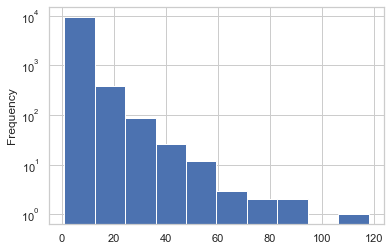

In [17]:
user_stats['num_study_days'].plot(kind='hist', logy=True)

<AxesSubplot:ylabel='Frequency'>

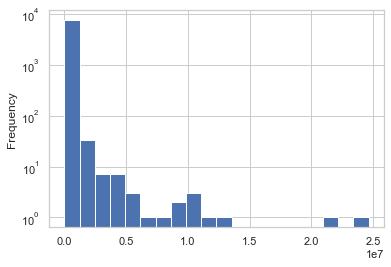

In [18]:
user_stats['avg_spend_time(s)'].plot(kind='hist', logy=True, bins=20)

Similar to other numerical features, the distributions also exhibit a long-tailed distribution.

#### e) Perform a multivariate analysis for two pairs of features of your choice. Please provide a metric and a visualization for both pairs. Please discuss: why did you choose these two pairs? What was your hypothesis? Do the results confirm your hypothesis?

The feature pairs are (`num_study_days`, `percentage_correct`) and (`num_reading`, `percentage_correct`). The basic hypothesis is that if user spend more days in learning (and more time in reading theory), the `percentage_correct` will increase.

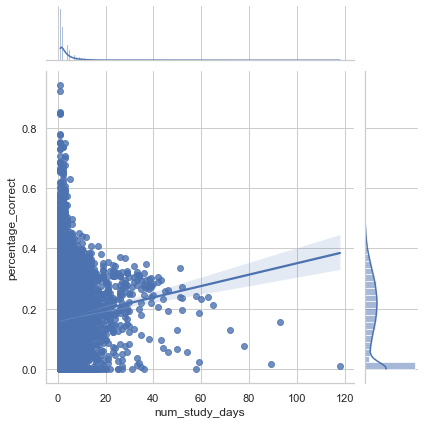

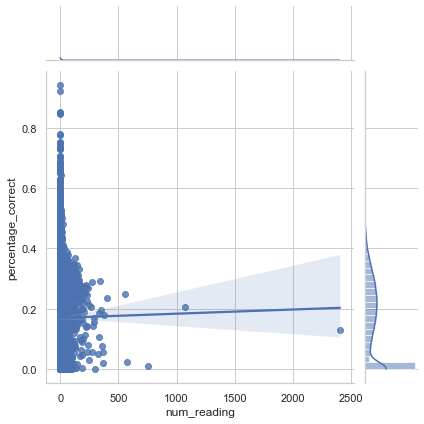

In [19]:
# Your code for multivariate analysis goes here
sns.jointplot(data=user_stats, x='num_study_days', y='percentage_correct', kind='reg', ax=axs[0])
sns.jointplot(data=user_stats, x='num_reading', y='percentage_correct', kind='reg', ax=axs[1])


As we can see, `num_reading` and `num_study_days` both have positive correlations with `percentage_correct`, which verified the hypothesis provided above.

# Task 3: Time-Series Analysis

In the last task, you will perform a time-series analysis.


#### a) Build a data frame containing one row per user per week:

``[user_id, week, num_events, num_questions, percentage_correct, num_reading]``


The features are defined as follows:

- **num_questions**: total number of questions the student answered **per week**(hint: action event = submit answer).

- **num_events**: total number of events of the student per week.

- **percentage_correct**: number of correct answers/total number of answers  **per week** (hint: evaluation = correct). If desired, you may assign a weight of 0.5 to partially correct answers.

- **num_reading**: total number of theory reading events **per week** (hint: action event = go to theory).

Where week 0 is the first week the specific user solved a task in the platform, i.e., the user's earliest entry in the transactions table.

Hint: You may extract the week of the year (dt.week) from the timestamps. 

You can limit the number of weeks to 13, i.e. for each user we just look at the first 13 weeks of data.
Yoy may change and justify your choice for the number of weeks.

In [20]:
# Your code for building the dataframe goes here
events_with_eval['week'] = pd.to_datetime(events_with_eval['timestamp'], unit='ms').dt.strftime('%Y-w%U')
events_with_eval

,event_id,user_id,timestamp,category,action,event_type,transaction_token,session_id,tracking_data,evaluation,week
0,62,393211,1621583814885,TASK,VIEW_QUESTION,VIEW,7a10ca52-ffb5-4069-8800-0dc86d778e94,NaN,NaN,NaN,2021-w20
1,63,393211,1621583898912,TASK,SUBMIT_ANSWER,CLICK,7a10ca52-ffb5-4069-8800-0dc86d778e94,NaN,NaN,NaN,2021-w20
2,64,393211,1621583907207,TASK,NEXT,CLICK,7a10ca52-ffb5-4069-8800-0dc86d778e94,NaN,NaN,NaN,2021-w20
3,65,393211,1621583907589,TASK,VIEW_QUESTION,VIEW,88fdcaad-f73b-46a2-b561-d262f2441442,NaN,NaN,NaN,2021-w20
4,66,393211,1621584222588,TASK,SUBMIT_ANSWER,CLICK,88fdcaad-f73b-46a2-b561-d262f2441442,NaN,NaN,NaN,2021-w20
...,...,...,...,...,...,...,...,...,...,...,...
3465554,3518462,404560,1645519933345,TASK,SUBMIT_ANSWER,CLICK,9edfed2d-ebe8-4b0e-873c-9ba13e6541b3,112259.0,NaN,1.0,2022-w08
3465555,3518463,404560,1645519934803,TASK,NEXT,CLICK,9edfed2d-ebe8-4b0e-873c-9ba13e6541b3,112259.0,NaN,1.0,2022-w08
3465556,3518464,404560,1645519935451,SESSION,REVIEW_TASK,VIEW,133248bc-5771-4240-94c2-77b23b7c2d97,112259.0,NaN,NaN,2022-w08
3465557,3518465,404552,1645519936842,USER_SESSION,WINDOW_VISIBLE_TRUE,VIEW,NaN,NaN,"{""location"": ""https://app.lernnavi.ch/session/...",NaN,2022-w08


In [21]:
users_weekly_event = events_with_eval.groupby(['user_id', 'week'])
users_weekly_stats = users_weekly_event.apply(len).reset_index(name='num_events')
users_weekly_stats

,user_id,week,num_events
0,387604,2021-w20,1
1,387604,2021-w21,1
2,387604,2021-w25,7
3,387604,2021-w26,25
4,387604,2021-w31,12
...,...,...,...
27705,404600,2022-w08,34
27706,404603,2022-w08,112
27707,404604,2022-w08,43
27708,404605,2022-w08,22


In [22]:
users_weekly_stats = users_weekly_stats.merge(user_gender, on='user_id', how='left')
users_weekly_stats

,user_id,week,num_events,gender
0,387604,2021-w20,1,NaN
1,387604,2021-w21,1,NaN
2,387604,2021-w25,7,NaN
3,387604,2021-w26,25,NaN
4,387604,2021-w31,12,NaN
...,...,...,...,...
27705,404600,2022-w08,34,NaN
27706,404603,2022-w08,112,FEMALE
27707,404604,2022-w08,43,FEMALE
27708,404605,2022-w08,22,FEMALE


In [23]:
weekly_percentage_correct = users_weekly_event.apply(lambda x: x['evaluation'].sum() / len(x[x['evaluation'] != np.nan]))
users_weekly_stats = users_weekly_stats.merge(weekly_percentage_correct.reset_index(name='percentage_correct'), on=['user_id', 'week'], how='left')
users_weekly_stats

,user_id,week,num_events,gender,percentage_correct
0,387604,2021-w20,1,NaN,0.000000
1,387604,2021-w21,1,NaN,0.000000
2,387604,2021-w25,7,NaN,0.000000
3,387604,2021-w26,25,NaN,0.000000
4,387604,2021-w31,12,NaN,0.000000
...,...,...,...,...,...
27705,404600,2022-w08,34,NaN,0.000000
27706,404603,2022-w08,112,FEMALE,0.254464
27707,404604,2022-w08,43,FEMALE,0.069767
27708,404605,2022-w08,22,FEMALE,0.000000


In [24]:
weekly_num_reading = users_weekly_event.apply(lambda x: len(x[x['action'] == 'GO_TO_THEORY']))
users_weekly_stats = users_weekly_stats.merge(weekly_num_reading.reset_index(name='num_reading'),
                                              on=['user_id', 'week'])
users_weekly_stats

,user_id,week,num_events,gender,percentage_correct,num_reading
0,387604,2021-w20,1,NaN,0.000000,0
1,387604,2021-w21,1,NaN,0.000000,0
2,387604,2021-w25,7,NaN,0.000000,0
3,387604,2021-w26,25,NaN,0.000000,0
4,387604,2021-w31,12,NaN,0.000000,0
...,...,...,...,...,...,...
27705,404600,2022-w08,34,NaN,0.000000,0
27706,404603,2022-w08,112,FEMALE,0.254464,0
27707,404604,2022-w08,43,FEMALE,0.069767,0
27708,404605,2022-w08,22,FEMALE,0.000000,0


#### b) Select two features and analyze their behavior over time. Please provide a hypothesis and visualization for both features. For ideas on how to perform a time series exploration, please check the lecture slides and notebook. Discuss your results: what do you observe? Do the results confirm your hypotheses?

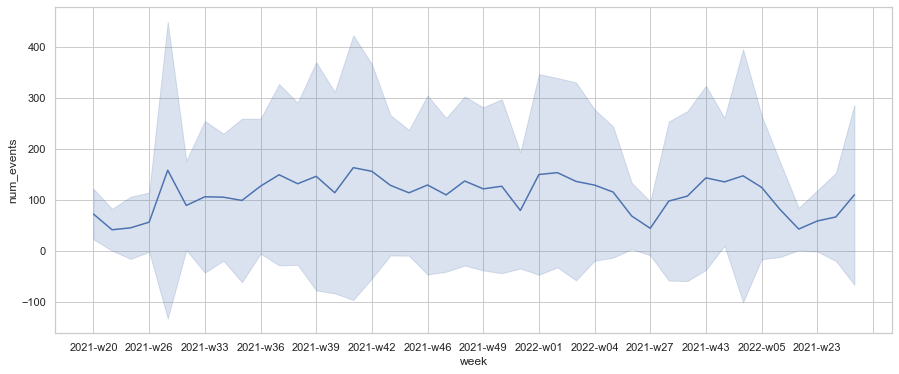

In [25]:
import matplotlib.ticker as ticker
fix, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(data=users_weekly_stats, x="week", y="num_events", ci='sd')
ticker_spacing = 3
ax.xaxis.set_major_locator(ticker.MultipleLocator(ticker_spacing))

The `num_events` feature  has a large variance, but its mean has a more stable trend over time: it stays roughly around 100.

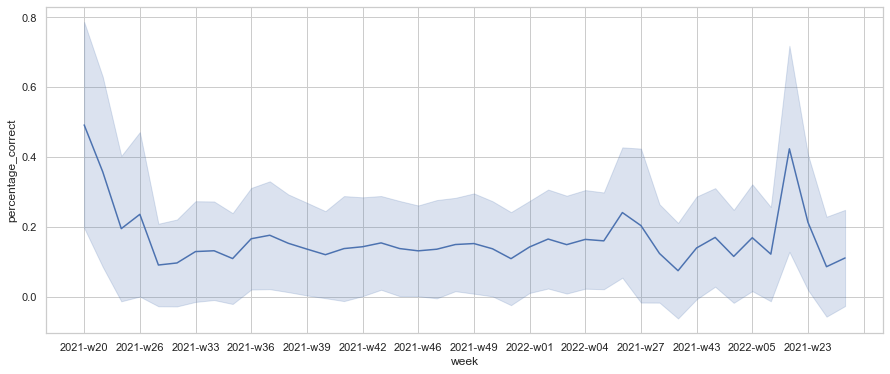

In [26]:
fix, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(data=users_weekly_stats, x="week", y="percentage_correct", ci='sd')
ticker_spacing = 3
ax.xaxis.set_major_locator(ticker.MultipleLocator(ticker_spacing))

feature `percentage_correct` started with a high mean (0.5), but over time the correct rate began to drop to about 0.1 and remained stable over time.

# Task 4: Creative extension 

Please provide **one** new hypothesis you would like to explore with the data and provide a visualization for it. Discuss your results: what do you observe? Do the results confirm your hypotheses?



**Hypothesis**: if user try to answer more questions, the percentage_correct will increase.

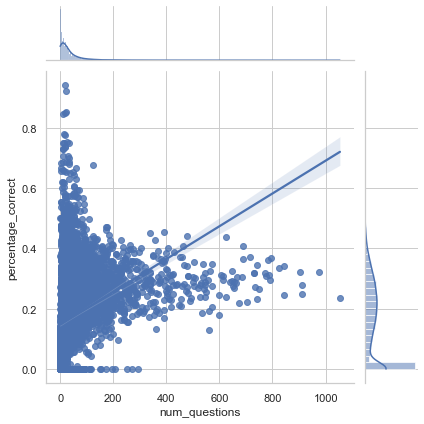

In [27]:
# Your creative visualization here
sns.jointplot(data=user_stats, x='num_questions', y='percentage_correct', kind='reg')

The figure illustrate that the feature `num_questions` has positive correlations with `percentage_correct`, which verified the hypothesis provided above. A possible explanation is that users with more attempts to answer questions may learn more about the knowledge. That is, more questions will give student positive reflection to their learning activities.